In [1]:
import pandas as pd

# OBJETIVO. Asociar los factores maternos y del parto con el apgar bajo

In [2]:
sip_df=pd.read_excel('sip_base_SE.xlsx')

## Describir características generales del parto utilizando las bases de datos del SIP para el año 2021

### Comprensión del dataset

In [4]:
sip_df.columns

Index(['ID_anonimo', 'VAR_0009', 'VAR_0012', 'VAR_0013', 'VAR_0015',
       'VAR_0016', 'VAR_0036', 'VAR_0182', 'VAR_0183', 'VAR_0185', 'VAR_0186',
       'VAR_0187', 'VAR_0188', 'VAR_0189', 'VAR_0190', 'VAR_0191', 'VAR_0198',
       'VAR_0199', 'VAR_0200', 'VAR_0201', 'VAR_0202', 'VAR_0203', 'VAR_0204',
       'VAR_0205', 'VAR_0206', 'VAR_0282', 'VAR_0285', 'VAR_0287', 'VAR_0288',
       'VAR_0291', 'VAR_0292', 'VAR_0293', 'VAR_0294', 'VAR_0295', 'VAR_0296',
       'VAR_0297', 'VAR_0298', 'VAR_0299', 'VAR_0300', 'VAR_0301', 'VAR_0302',
       'VAR_0303', 'VAR_0304', 'VAR_0305', 'VAR_0310', 'VAR_0311', 'VAR_0312',
       'VAR_0313', 'VAR_0314', 'VAR_0315', 'VAR_0316', 'VAR_0319', 'VAR_0320',
       'VAR_0321', 'VAR_0322', 'VAR_0323', 'VAR_0324', 'VAR_0325', 'VAR_0326',
       'VAR_0327', 'VAR_0328', 'VAR_0331', 'VAR_0333', 'VAR_0335', 'VAR_0336',
       'VAR_0337', 'VAR_0339', 'VAR_0341', 'VAR_0329', 'VAR_0330', 'VAR_0258',
       'VAR_0260', 'VAR_0266', 'VAR_0261', 'VAR_0267', 'VAR_02

In [5]:
#Entendiendo la dimensión del dataset
sip_df.shape

(214197, 80)

In [6]:
sip_df.head()

,ID_anonimo,VAR_0009,VAR_0012,VAR_0013,VAR_0015,VAR_0016,VAR_0036,VAR_0182,VAR_0183,VAR_0185,...,VAR_0258,VAR_0260,VAR_0266,VAR_0261,VAR_0267,VAR_0273,VAR_0274,VAR_0275,VAR_0430,VAR_0431
0,969167,4.0,1.0,C,B,0.0,0.0,A,09/2021,9.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
1,188942,4.0,1.0,C,B,0.0,0.0,A,02/2021,NaN,...,1.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
2,134058,3.0,1.0,C,B,0.0,0.0,A,11/2021,8.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
3,124022,3.0,0.0,B,B,0.0,0.0,A,11/2021,5.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
4,685285,4.0,1.0,C,B,0.0,0.0,A,10/2021,10.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II


## Reestructuración del data set

### Acotar el dataset según las Variables seleccionadas

Se espera tomar como variable maestra a :
VAR_0322	Apgar 5to. Minuto

VAR_0009	Grupo de edad materna
VAR_0185	Consultas prenatales
VAR_0198	Edad gestacional al parto
VAR_0258	Trastornos hipertensivos
VAR_0260	Preeclampsia
VAR_0261	Eclampsia
VAR_0267	Infección genital
VAR_0311	Peso al nacer


In [11]:
vars_selec=['VAR_0009',
'VAR_0185',
'VAR_0198',
'VAR_0258',
'VAR_0260',
'VAR_0261',
'VAR_0266',
'VAR_0267',
'VAR_0311',
'VAR_0322'
]	

In [9]:
print(vars_selec)

['VAR_0009', 'VAR_0185', 'VAR_0198', 'VAR_0258', 'VAR_0260', 'VAR_0261', 'VAR_0266', 'VAR_0267', 'VAR_0311', 'VAR_0322']


In [8]:
#tabla de cruce - var 1 y var2 - conteo por categoria **** DISTRIBUCIONES DE CATEGORIAS
# verificacion de inconsistencias
pd.crosstab([sip_df['VAR_0182'], sip_df['VAR_0258']], sip_df['VAR_0009']).to_clipboard()
pd.crosstab([sip_df['VAR_0182'], sip_df['VAR_0258']], sip_df['VAR_0009'])

VAR_0009            1.0    2.0    3.0    4.0    5.0    6.0   7.0  8.0
VAR_0182 VAR_0258                                                    
A        0.0       1020  19593  43669  39275  25297  12778  3698  169
         1.0         72   1163   2595   2786   2336   1771   751   56
B        0.0         22    103    235    243    193    143    74    1
         1.0          0      0      2      0      3      2     1    0
\        0.0          0      0      1      1      2      0     0    0

In [12]:
#Creacion de un dataframe con la delimitacion segun las variables definidas 
sip_varsdef_df=sip_df.loc[:,vars_selec]

In [13]:
sip_varsdef_df.head(50)

,VAR_0009,VAR_0185,VAR_0198,VAR_0258,VAR_0260,VAR_0261,VAR_0266,VAR_0267,VAR_0311,VAR_0322
0,4.0,9.0,39.0,0.0,0.0,0.0,NaN,NaN,3090.0,10.0
1,4.0,NaN,38.0,1.0,1.0,0.0,NaN,NaN,2570.0,10.0
2,3.0,8.0,38.0,0.0,0.0,0.0,NaN,NaN,2990.0,10.0
3,3.0,5.0,39.0,0.0,0.0,0.0,NaN,NaN,3670.0,10.0
4,4.0,10.0,39.0,0.0,0.0,0.0,NaN,NaN,3600.0,10.0
5,4.0,9.0,40.0,0.0,0.0,0.0,NaN,NaN,4010.0,10.0
6,5.0,6.0,39.0,1.0,0.0,0.0,NaN,NaN,3500.0,7.0
7,4.0,5.0,39.0,0.0,0.0,0.0,NaN,NaN,3400.0,10.0
8,3.0,6.0,40.0,0.0,0.0,0.0,NaN,NaN,3710.0,10.0
9,3.0,7.0,41.0,0.0,0.0,0.0,NaN,NaN,3650.0,7.0


In [12]:
sip_varsdef_df.shape

(214197, 10)

In [14]:
sip_varsdef_df.columns

Index(['VAR_0009', 'VAR_0185', 'VAR_0198', 'VAR_0258', 'VAR_0260', 'VAR_0261',
       'VAR_0266', 'VAR_0267', 'VAR_0311', 'VAR_0322'],
      dtype='object')

In [ ]:
#sip_varsdef_df.to_csv('sip_varsdef.csv')

## Limpieza de datos

### Eliminacion de variables con gran cantidad de valores nulos

In [56]:
### Identificación de valores nulos
sip_varsdef_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214197 entries, 0 to 214196
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VAR_0009  214163 non-null  float64
 1   VAR_0185  197516 non-null  float64
 2   VAR_0198  213956 non-null  float64
 3   VAR_0258  162039 non-null  float64
 4   VAR_0260  135755 non-null  float64
 5   VAR_0261  135220 non-null  float64
 6   VAR_0266  28780 non-null   float64
 7   VAR_0267  29172 non-null   float64
 8   VAR_0311  214191 non-null  float64
 9   VAR_0322  214128 non-null  float64
dtypes: float64(10)
memory usage: 16.3 MB


In [21]:
# Porcentaje de valores nulos de las variables elegidas 
(sip_varsdef_df.isnull().sum()/len(sip_varsdef_df)*100).sort_values(ascending=False).round(3)

VAR_0266    86.564
VAR_0267    86.381
VAR_0261    36.871
VAR_0260    36.621
VAR_0258    24.350
VAR_0185     7.788
VAR_0198     0.113
VAR_0322     0.032
VAR_0009     0.016
VAR_0311     0.003
dtype: float64

In [20]:
#Cantidad de valores null
sip_varsdef_df.isna().sum().sort_values(ascending=False)

VAR_0266    185417
VAR_0267    185025
VAR_0261     78977
VAR_0260     78442
VAR_0258     52158
VAR_0185     16681
VAR_0198       241
VAR_0322        69
VAR_0009        34
VAR_0311         6
dtype: int64

In [26]:
#Creación de una copia del dataset para realizar modificaciones
sip_varsdef_df_c=sip_varsdef_df.copy()

In [24]:
#Eliminación de las variables 'VAR_0266' y 'VAR_0267' por su alto nivel de datos nulos 
sip_varsdef_df_c.drop(['VAR_0266', 'VAR_0267'], axis=1, inplace=True)   

In [25]:
sip_varsdef_df_c.columns

Index(['VAR_0009', 'VAR_0185', 'VAR_0198', 'VAR_0258', 'VAR_0260', 'VAR_0261',
       'VAR_0311', 'VAR_0322'],
      dtype='object')

#### Analisis contenido de Variables

##### Analisis de valores unicos por variable

In [46]:
#Valores unicos
sip_varsdef_df_c['VAR_0009'].unique()

array([ 4.,  3.,  5.,  2.,  1.,  6.,  7.,  8., nan])

In [48]:
sip_varsdef_df_c['VAR_0198'].unique()

array([39., 38., 40., 41., 37., 34., 23.,  0., 36., 35., 26., 43., 29.,
       31., 33., 42., 25., 21., 24., 32., 30., 20., 28., 22., 27., 16.,
       10., 11., 18.,  9.,  3., 19.,  1., 44.,  2., 12.,  8., 14., 15.,
       17.,  7.,  6.,  4.,  5., 13., nan, 98., 65.])

In [49]:
sip_varsdef_df_c['VAR_0322'].unique()

array([10.,  7.,  9.,  1.,  8.,  2.,  0.,  6.,  4.,  3.,  5., nan, -1.])

In [50]:
sip_varsdef_df_c['VAR_0258'].unique()

array([ 0.,  1., nan])

In [51]:
sip_varsdef_df_c['VAR_0260'].unique()

array([ 0.,  1., nan])

In [52]:
sip_varsdef_df_c['VAR_0261'].unique()

array([ 0.,  1., nan])

##### cuantificacion de las categorias por variable

In [31]:
sip_varsdef_df_c['VAR_0009'].value_counts().sort_values(ascending=False).to_clipboard()
sip_varsdef_df_c['VAR_0009'].value_counts().sort_values(ascending=False)

VAR_0009
3.0    63288
4.0    56720
5.0    37059
2.0    28891
6.0    19688
7.0     5980
1.0     2253
8.0      284
Name: count, dtype: int64

In [27]:
sip_varsdef_df_c['VAR_0185'].describe().to_clipboard()
sip_varsdef_df_c['VAR_0185'].describe()

count    197516.000000
mean          6.055788
std           2.954832
min           0.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          80.000000
Name: VAR_0185, dtype: float64

In [32]:
sip_varsdef_df_c['VAR_0198'].value_counts().sort_values(ascending=False).to_clipboard()
sip_varsdef_df_c['VAR_0198'].value_counts().sort_values(ascending=False)

VAR_0198
39.0    56872
38.0    45778
40.0    41010
37.0    21251
41.0    13401
0.0     11004
36.0     8519
35.0     4454
34.0     2978
33.0     1696
32.0     1180
31.0      814
30.0      734
42.0      501
29.0      465
28.0      458
27.0      353
26.0      287
25.0      280
24.0      225
10.0      176
8.0       166
6.0       164
23.0      160
22.0      113
9.0        94
7.0        91
20.0       90
21.0       67
12.0       65
5.0        61
14.0       51
11.0       50
15.0       49
13.0       48
16.0       47
17.0       46
18.0       46
19.0       41
43.0       40
4.0        10
44.0        8
3.0         7
2.0         3
1.0         1
98.0        1
65.0        1
Name: count, dtype: int64

In [33]:
sip_varsdef_df_c['VAR_0311'].describe().to_clipboard()
sip_varsdef_df_c['VAR_0311'].describe()

count    214191.000000
mean       3238.672045
std         678.877600
min           0.000000
25%        2970.000000
50%        3310.000000
75%        3640.000000
max        6090.000000
Name: VAR_0311, dtype: float64

In [72]:
sip_varsdef_df_c['VAR_0311'].value_counts().sort_values(ascending=False).to_clipboard()
sip_varsdef_df_c['VAR_0311'].value_counts().sort_values(ascending=False)

VAR_0311
3400.0    2728
3200.0    2688
3300.0    2687
3500.0    2673
3100.0    2471
          ... 
1318.0       1
1714.0       1
1982.0       1
1947.0       1
5135.0       1
Name: count, Length: 3114, dtype: int64

In [34]:
sip_varsdef_df_c['VAR_0322'].value_counts().sort_values(ascending=False).to_clipboard()
sip_varsdef_df_c['VAR_0322'].value_counts().sort_values(ascending=False)

VAR_0322
 10.0    100607
 9.0      90936
 8.0      10612
 0.0       8195
 7.0       2264
 6.0        529
 5.0        420
 4.0        188
 1.0        155
 3.0        119
 2.0         74
-1.0         29
Name: count, dtype: int64

In [64]:
sip_varsdef_df_c['VAR_0258'].value_counts().sort_values(ascending=False)

VAR_0258
0.0    150259
1.0     11780
Name: count, dtype: int64

In [65]:
sip_varsdef_df_c['VAR_0260'].value_counts().sort_values(ascending=False)

VAR_0260
0.0    132423
1.0      3332
Name: count, dtype: int64

In [66]:
sip_varsdef_df_c['VAR_0261'].value_counts().sort_values(ascending=False)

VAR_0261
0.0    134832
1.0       388
Name: count, dtype: int64

### Análisis y modificacion de tipos de dato de las variables
VAR_0009	Grupo de edad materna	    -variable categórica
VAR_0185	Consultas prenatales	    -variable numérica
VAR_0198	Edad gestacional al parto	-variable numérica
VAR_0258	Trastornos hipertensivos	-variable binaria
VAR_0260	Preeclampsia	            -variable binaria
VAR_0261	Eclampsia	                -variable binaria
VAR_0311	Peso al nacer	            -variable numérica
VAR_0322	Apgar 5to. Minuto	        -variable numérica

In [67]:
#Conversion de data 'float' a 'int'
sip_varsdef_df_c['VAR_0009'] =sip_varsdef_df_c['VAR_0009'].astype(pd.Int64Dtype())
sip_varsdef_df_c['VAR_0185'] =sip_varsdef_df_c['VAR_0185'].astype(pd.Int64Dtype())
sip_varsdef_df_c['VAR_0198'] =sip_varsdef_df_c['VAR_0198'].astype(pd.Int64Dtype())
sip_varsdef_df_c['VAR_0322'] =sip_varsdef_df_c['VAR_0322'].astype(pd.Int64Dtype())


In [72]:
#Conversion de data 'float' a 'bool'
sip_varsdef_df_c['VAR_0258'] =sip_varsdef_df_c['VAR_0258'].astype(bool)
sip_varsdef_df_c['VAR_0260'] =sip_varsdef_df_c['VAR_0260'].astype(bool)
sip_varsdef_df_c['VAR_0261'] =sip_varsdef_df_c['VAR_0261'].astype(bool)

In [75]:
sip_varsdef_df_c.dtypes

VAR_0009      Int64
VAR_0185      Int64
VAR_0198      Int64
VAR_0258       bool
VAR_0260       bool
VAR_0261       bool
VAR_0311    float64
VAR_0322      Int64
dtype: object

In [68]:
sip_varsdef_df_c.dtypes

VAR_0009      Int64
VAR_0185      Int64
VAR_0198      Int64
VAR_0258    float64
VAR_0260    float64
VAR_0261    float64
VAR_0311    float64
VAR_0322      Int64
dtype: object

#### Analisis de valores Null y otros

In [78]:
sip_varsdef_df_c.isna().sum().sort_values(ascending=False)

VAR_0185    16681
VAR_0198      241
VAR_0322       69
VAR_0009       34
VAR_0311        6
VAR_0258        0
VAR_0260        0
VAR_0261        0
dtype: int64

In [80]:
sip_varsdef_df_c['VAR_0185'].unique()

<IntegerArray>
[   9, <NA>,    8,    5,   10,    6,    7,    0,   12,    3,    2,    1,   11,
    4,   13,   15,   14,   18,   16,   19,   17,   20,   50,   80,   21,   30,
   22,   23,   29,   25,   24,   27,   32,   53,   26,   34,   28,   60]
Length: 38, dtype: Int64

In [79]:
sip_varsdef_df_c.loc[sip_varsdef_df_c['VAR_0185'].isna(),:]

,VAR_0009,VAR_0185,VAR_0198,VAR_0258,VAR_0260,VAR_0261,VAR_0311,VAR_0322
1,4,<NA>,38,True,True,False,2570.0,10
75,6,<NA>,40,False,False,False,3300.0,10
78,6,<NA>,38,True,False,False,3520.0,10
83,6,<NA>,40,False,False,False,3250.0,10
93,6,<NA>,40,False,False,False,3120.0,10
...,...,...,...,...,...,...,...,...
209740,4,<NA>,16,True,True,True,60.0,0
210328,4,<NA>,20,True,False,False,340.0,1
210380,4,<NA>,17,True,True,True,145.0,-1
212744,3,<NA>,15,True,True,True,55.0,0


In [81]:
sip_varsdef_df_c['VAR_0185'].tail(20)

214177    1
214178    4
214179    1
214180    1
214181    3
214182    2
214183    1
214184    1
214185    4
214186    5
214187    1
214188    1
214189    1
214190    3
214191    5
214192    8
214193    4
214194    4
214195    4
214196    4
Name: VAR_0185, dtype: Int64

In [82]:
sip_varsdef_df_c['VAR_0185'].head(20)

0        9
1     <NA>
2        8
3        5
4       10
5        9
6        6
7        5
8        6
9        7
10       0
11      12
12       3
13       0
14       2
15       9
16       1
17      10
18       0
19       7
Name: VAR_0185, dtype: Int64

### Exportar el dataframe modificado a un archivo .csv

In [84]:
sip_varsdef_df_c.to_csv('sip_varsdef_df_c.csv')

## MODELO

In [76]:
#Importamos librerias relevantes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
#sip_formodeldf=pd.read_csv('sip_base_SE_sinnan.csv', sep=';')
sip_formodeldf=pd.read_csv('dataset_filtrado_v2_20231130_2.csv', sep=';')

In [82]:
sip_formodeldf.shape

(186597, 8)

In [83]:
sip_formodeldf.columns

Index(['Edad_mat', 'Consult_prenat', 'Edad_gest', 'Ttornos_hipert', 'Pre_ecl',
       'Ecl', 'Peso_al_nacer', 'Condicion'],
      dtype='object')

In [67]:
#Agregar var
#sip_formodeldf['VAR_0322_c']=sip_formodeldf['VAR_0322']
#cond=sip_formodeldf['VAR_0322']>=7   #0-6 =1, 7-10=0
#cond2=sip_formodeldf['VAR_0322']<=6

KeyError: 'VAR_0322'

In [43]:
#sip_formodeldf['VAR_0322_c']=np.where(sip_formodeldf['VAR_0322']>=7, 0, 1)

In [84]:
sip_formodeldf.tail()

,Edad_mat,Consult_prenat,Edad_gest,Ttornos_hipert,Pre_ecl,Ecl,Peso_al_nacer,Condicion
186592,0,10,38,0,0,0,3.220,0
186593,0,13,39,1,1,1,4.105,0
186594,0,8,38,0,0,0,3.760,0
186595,0,2,40,0,0,0,4.360,0
186596,0,7,39,0,0,0,3.960,0


In [85]:
sip_formodeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186597 entries, 0 to 186596
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Edad_mat        186597 non-null  int64  
 1   Consult_prenat  186597 non-null  int64  
 2   Edad_gest       186597 non-null  int64  
 3   Ttornos_hipert  186597 non-null  int64  
 4   Pre_ecl         186597 non-null  int64  
 5   Ecl             186597 non-null  int64  
 6   Peso_al_nacer   186597 non-null  float64
 7   Condicion       186597 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 11.4 MB


In [86]:
# Vemos la proporcion de la variable objetivo
sip_formodeldf['Condicion'].value_counts(normalize=True)

Condicion
0    0.993049
1    0.006951
Name: proportion, dtype: float64

In [87]:
feature_cols=['Edad_mat',
'Consult_prenat',
'Edad_gest',
'Ttornos_hipert',
'Pre_ecl',
'Ecl',
'Peso_al_nacer']

In [45]:
#feature_cols=['VAR_0009',
#'VAR_0185',
#'VAR_0198',
#'VAR_0258',
#'VAR_0260',
#'VAR_0261',
#'VAR_0311'
#]	

In [88]:
#Division de las columnas dadas en dos tipos de variables dependientes (o variable objetivo) e independientes (o variables de características).
x = sip_formodeldf[feature_cols] # Features
#y = sip_formodeldf['VAR_0322_c'] # Variable objetivo
y = sip_formodeldf['Condicion'] # Variable objetivo

In [89]:
# Division del conjunto de datos en conjunto de entrenamiento y conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state=1) # 70% de entrenamiento y 30% de prueba


In [90]:
# Crear un objeto clasificador de árbol de decisiones
dtc = DecisionTreeClassifier ()
# Clasificador de árboles de decisiones de trenes
dtc = dtc.fit(x_train, y_train)
#Predict la respuesta para el conjunto de datos de prueba
y_pred = dtc.predict (x_test)

In [91]:
# Precisión del modelo, ¿con qué frecuencia es correcto el clasificador?
print ("Precisión:", accuracy_score (y_test, y_pred))

Precisión: 0.9886923901393355


In [120]:
#TABLA DE CONFUSION
#los falsos negativos son muy altos, hay que tener cuidado.
pd.crosstab(y_test, y_pred).to_clipboard() # la diagonal es la precision, del grupo 0 hay valores correctos 59702
pd.crosstab(y_test, y_pred)

col_0,0,1
Condicion,,
0,55287,287
1,346,60


In [105]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from io import StringIO
from IPython.display import Image  
import pydotplus


In [106]:
dot_data = StringIO()


In [127]:
'''export_graphviz(dtc, out_file=dot_data, filled = True, rounded = True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('apgar5.png')
Image(graph.create_png())'''

"export_graphviz(dtc, out_file=dot_data, filled = True, rounded = True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png('apgar5.png')\nImage(graph.create_png())"

In [101]:
from sklearn import tree 

[Text(0.12705262542663195, 0.9864864864864865, 'x[2] <= 26.5\ngini = 0.014\nsamples = 130617\nvalue = [129726, 891]'),
 Text(0.032657816692557545, 0.9594594594594594, 'x[6] <= 0.738\ngini = 0.489\nsamples = 379\nvalue = [217, 162]'),
 Text(0.017370427905663042, 0.9324324324324325, 'x[3] <= 0.5\ngini = 0.485\nsamples = 152\nvalue = [63, 89]'),
 Text(0.012145177234853834, 0.9054054054054054, 'x[6] <= 0.635\ngini = 0.454\nsamples = 115\nvalue = [40, 75]'),
 Text(0.006891681965824036, 0.8783783783783784, 'x[6] <= 0.18\ngini = 0.382\nsamples = 66\nvalue = [17, 49]'),
 Text(0.006439768394294591, 0.8513513513513513, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.007343595537353481, 0.8513513513513513, 'x[1] <= 2.5\ngini = 0.359\nsamples = 64\nvalue = [15, 49]'),
 Text(0.00361530857223556, 0.8243243243243243, 'x[2] <= 22.5\ngini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(0.003163395000706115, 0.7972972972972973, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.004067222143765005, 0

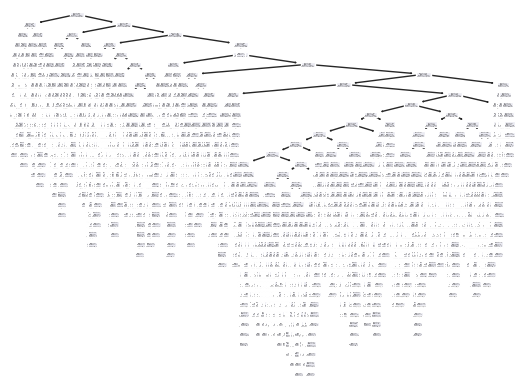

In [102]:
tree.plot_tree(dtc)

In [0]:
export_graphviz(dtc, out_file=dot_data, filled = True, rounded = True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('apgar5.png')
#graph.write_png('decision_tree.png')  # Write the graph to a PNG file

### Feature Importance

In [109]:
from sklearn.ensemble import RandomForestClassifier

feature_names = feature_cols
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

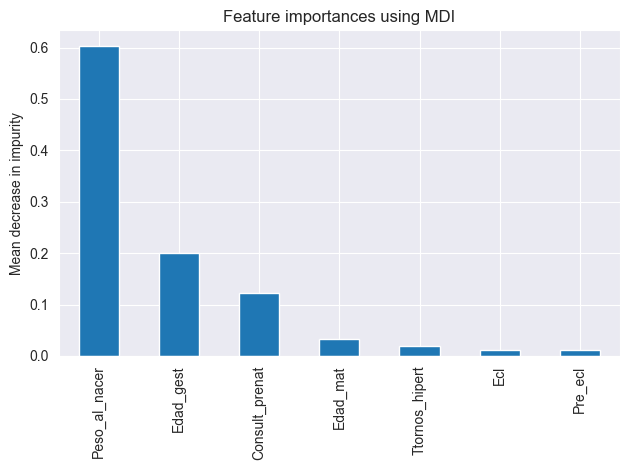

In [119]:
importances = forest.feature_importances_

import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar()
plt.savefig('prueba1.png')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

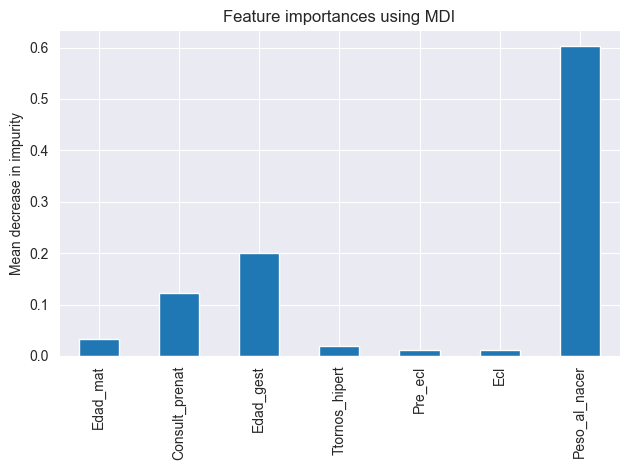

In [ ]:
dtc.feature_importances_